<a href="https://colab.research.google.com/github/jaewook94/wandb/blob/main/colabs/wandb-log/Log_(Almost)_Anything_with_W%26B_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![](https://paper-attachments.dropbox.com/s_C0EC7008D045FC80715C08E7386E0BBDA59DC92DEE34C734FEA67BF25E4BA5CC_1578297638486_image.png)



In [3]:
!pip install wandb -qq

# Fetch audio, video and other data files to log
!git clone https://github.com/wandb/examples.git


import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Cloning into 'examples'...
Updating files:  67% (131/193)
Updating files:  68% (132/193)
Updating files:  69% (134/193)
Updating files:  70% (136/193)
Updating files:  71% (138/193)
Updating files:  72% (139/193)
Updating files:  73% (141/193)
Updating files:  74% (143/193)
Updating files:  75% (145/193)
Updating files:  76% (147/193)
Updating files:  77% (149/193)
Updating files:  78% (151/193)
Updating files:  79% (153/193)
Updating files:  80% (155/193)
Updating files:  81% (157/193)
Updating files:  82% (159/193)
Updating files:  83% (161/193)
Updating files:  84% (163/193)
Updating files:  85% (165/193)
Updating files:  86% (166/193)
Updating files:  87% (168/193)
Updating files:  88% (170/193)
Updating files:  89% (172/193)
Updating files:  90% (174/193)
Updating files:  91% (176/193)
Updating files:  92% (178/193)
Updating files:  93% (180/193)
Updating files:  94% (182/193)
Updating files:  95% (184/193)
Updating files:  96% (186/193)
Updating files:  97% (188/193)
Updating fil

In [1]:
!pip install soundfile -qq

In [2]:
import pandas as pd
import numpy as np
import wandb

# Log metrics

In [4]:
# Get Apple stock price data from
# https://www.macrotrends.net/stocks/charts/AAPL/apple/stock-price-history
# Read in dataset
apple = pd.read_csv("examples/data/apple.csv")
apple = apple[-1000:]

In [6]:
apple['close']

8849     97.13
8850     96.66
8851     96.79
8852     96.30
8853    101.42
         ...  
9844    291.52
9845    293.65
9846    300.35
9847    297.43
9848    299.80
Name: close, Length: 1000, dtype: float64

In [7]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="metrics")

# Log the metric on each step
for price in apple['close']:
    wandb.log({"Stock Price": price})

wandb.finish()

wandb: Currently logged in as: jaewooklee (use `wandb login --relogin` to force relogin)


Stock Price,299.8
_runtime,9
_timestamp,1627561792
_step,999


Stock Price,▁▁▂▁▁▁▁▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▄▅▆▆▄▃▄▄▅▅▅▅▆▆▇█
_runtime,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_timestamp,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███


# Log plots

In [10]:
!pip install plotly

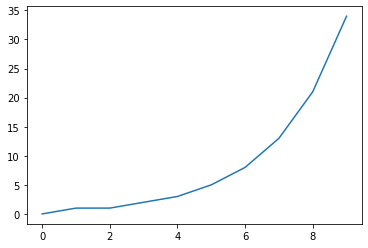

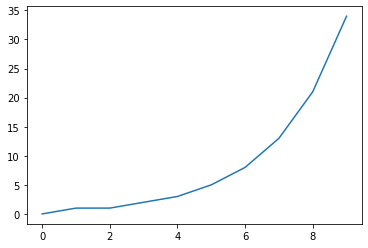

In [14]:
fibonacci = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
fig, ax = plt.subplots()
ax.plot(fibonacci)
fig

wandb: ERROR Problem finishing run
Traceback (most recent call last):
  File "C:\anaconda3\lib\site-packages\wandb\sdk\wandb_run.py", line 1601, in _atexit_cleanup
    self._on_finish()
  File "C:\anaconda3\lib\site-packages\wandb\sdk\wandb_run.py", line 1737, in _on_finish
    self.history._flush()
  File "C:\anaconda3\lib\site-packages\wandb\sdk\wandb_history.py", line 59, in _flush
    self._callback(row=self._data, step=self._step)
  File "C:\anaconda3\lib\site-packages\wandb\sdk\wandb_run.py", line 931, in _history_callback
    self._backend.interface.publish_history(
  File "C:\anaconda3\lib\site-packages\wandb\sdk\interface\interface.py", line 219, in publish_history
    data = data_types.history_dict_to_json(run, data, step=step)
  File "C:\anaconda3\lib\site-packages\wandb\sdk\data_types.py", line 2294, in history_dict_to_json
    payload[key] = val_to_json(run, key, val, namespace=step)
  File "C:\anaconda3\lib\site-packages\wandb\sdk\data_types.py", line 2319, in val_to_json

_runtime,9
_timestamp,1627562853
_step,0


_runtime,▁
_timestamp,▁
_step,▁


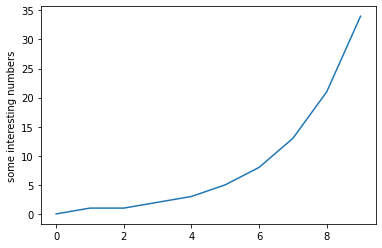

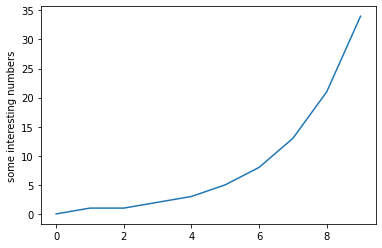

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize a new run
wandb.init(project="visualize-predictions", name="plots")

# Make the plot
fibonacci = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
fig, ax = plt.subplots()
ax.plot(fibonacci)
ax.set_ylabel("some interesting numbers")

# Log the plot
wandb.log({"plot": wandb.Image(fig)})
wandb.finish()
fig

# Log Histograms

In [17]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="histograms")

fibonacci = np.array([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])

# Log a histogram on each step
for i in range(1, 10):
  wandb.log({"histograms":
             wandb.Histogram(fibonacci / i)})
  
wandb.finish()

_runtime,9
_timestamp,1627563281
_step,8


_runtime,▁▁▁▁▁▁▁▁▁
_timestamp,▁▁▁▁▁▁▁▁▁
_step,▁▂▃▄▅▅▆▇█


# Log images

In [19]:
import matplotlib.pyplot as plt

# Initialize a new run
wandb.init(project="visualize-predictions", name="images")

# Generate an image
path_to_img = "examples/data/cafe.jpg"
im = plt.imread(path_to_img)

# Log the image
wandb.log({"img": [wandb.Image(im, caption="Cafe")]})

wandb.finish()

_runtime,9
_timestamp,1627563420
_step,0


_runtime,▁
_timestamp,▁
_step,▁


# Log videos

In [20]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="videos")

# Generate a video
path_to_video = "examples/data/openai-gym.mp4"

# Log the video
wandb.log({"video": wandb.Video(path_to_video, fps=4, format="gif")})

wandb.finish()

_runtime,8
_timestamp,1627563571
_step,0


_runtime,▁
_timestamp,▁
_step,▁


![](https://api.wandb.ai/files/lavanyashukla/visualize-predictions/0gv4owya/media/videos/openai-gym_89a16925.mp4)

# Log audio

In [21]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="audio")

# Generate audio data
path_to_audio = "examples/data/piano.wav"

# Log that audio data
wandb.log({"examples":
           [wandb.Audio(path_to_audio, caption="Piano", sample_rate=32)]})

wandb.finish()

_runtime,8
_timestamp,1627563646
_step,0


_runtime,▁
_timestamp,▁
_step,▁


# Log tables

In [22]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="tables")

# Create tabular data, method 1
data = [["I love my phone", "1", "1"],["My phone sucks", "0", "-1"]]
wandb.log({"a_table": wandb.Table(data=data, columns=["Text", "Predicted Label", "True Label"])})

# Create tabular data, method 2
table = wandb.Table(columns=["Text", "Predicted Label", "True Label"])
table.add_data("I love my phone", "1", "1")
table.add_data("My phone sucks", "0", "-1")
wandb.log({"another_table": table})

wandb.finish()

_runtime,10
_timestamp,1627563805
_step,1


_runtime,▁█
_timestamp,▁█
_step,▁█


# Log HTML

In [ ]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="html")

# Generate HTML data
path_to_html = "examples/examples/data/some_html.html"

# Log an HTML file
wandb.log({"custom_file": wandb.Html(open(path_to_html))})

# Log raw HTML strings
wandb.log({"custom_string": wandb.Html('<a href="https://mysite">Link</a>')})

wandb.finish()

# Log 3D Objects

In [ ]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="3d_objects")

# Generate 3D object data
path_to_obj = "examples/examples/data/wolf.obj"

# Log the 3D object
wandb.log({"3d_object": wandb.Object3D(open(path_to_obj))})

wandb.finish()

# Log Point Clouds

In [ ]:
# Initialize a new run
wandb.init(project="visualize-predictions", name="point_clouds")

# Generate a cloud of points
points = np.random.uniform(size=(250, 3))

# Log points and boxes in W&B
wandb.log(
        {
            "point_scene": wandb.Object3D(
                {
                    "type": "lidar/beta",
                    "points": points,
                    "boxes": np.array(
                        [
                            {
                                "corners": [
                                    [0,0,0],
                                    [0,1,0],
                                    [0,0,1],
                                    [1,0,0],
                                    [1,1,0],
                                    [0,1,1],
                                    [1,0,1],
                                    [1,1,1]
                                ],
                                "label": "Box",
                                "color": [123,321,111],
                            },
                            {
                                "corners": [
                                    [0,0,0],
                                    [0,2,0],
                                    [0,0,2],
                                    [2,0,0],
                                    [2,2,0],
                                    [0,2,2],
                                    [2,0,2],
                                    [2,2,2]
                                ],
                                "label": "Box-2",
                                "color": [111,321,0],
                            }
                        ]
                    ),
                    "vectors": np.array([])
                }
            )
        }
    )

wandb.finish()

## More Resources
Check out some other cool things you can do with Weights & Biases:
* [Track model performance](https://app.wandb.ai/lavanyashukla/visualize-models/reports/Visualize-Model-Performance--Vmlldzo1NTk2MA)
* [Visualize sklearn models](https://app.wandb.ai/lavanyashukla/visualize-sklearn/reports/Visualize-Sklearn-Model-Performance--Vmlldzo0ODIzNg)
* [Visualize model predictions](https://app.wandb.ai/lavanyashukla/visualize-predictions/reports/Visualize-Model-Predictions--Vmlldzo1NjM4OA/)